# $$ Data \ Analysis \ and \ Prediction \ for \ House \ Grading \ Data $$

In [156]:
import pandas as pd
import numpy as np  
from numpy.random import default_rng
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import confusion_matrix 
from matplotlib.colors import ListedColormap 
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
import matplotlib.pyplot as plt
from matplotlib import pyplot
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.simplefilter(action='ignore')

#first we have to import all relevant python packages 
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt 
from matplotlib import pyplot
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import warnings
warnings.simplefilter(action='ignore')

from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.metrics import classification_report

## Data importing:

In [2]:
df=pd.read_csv('Project2_Classification_HouseGrade_Data_Project.csv.xls')
df.head()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D


In [3]:
df.columns

Index(['Id', 'Area(total)', 'Trooms', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms',
       'roof', 'Roof(Area)', 'Lawn(Area)', 'Nfloors', 'API', 'ANB',
       'Expected price', 'Grade'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              3000 non-null   int64 
 1   Area(total)     3000 non-null   int64 
 2   Trooms          3000 non-null   int64 
 3   Nbedrooms       3000 non-null   int64 
 4   Nbwashrooms     3000 non-null   int64 
 5   Twashrooms      3000 non-null   int64 
 6   roof            3000 non-null   object
 7   Roof(Area)      3000 non-null   int64 
 8   Lawn(Area)      3000 non-null   int64 
 9   Nfloors         3000 non-null   int64 
 10  API             3000 non-null   int64 
 11  ANB             3000 non-null   int64 
 12  Expected price  3000 non-null   int64 
 13  Grade           3000 non-null   object
dtypes: int64(12), object(2)
memory usage: 328.2+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,3000.0,1500.500000,866.169729,1.0,750.75,1500.5,2250.25,3000.0
Area(total),3000.0,325.117000,20.507742,290.0,308.00,325.0,343.00,360.0
Trooms,3000.0,7.021667,1.421221,5.0,6.00,7.0,8.00,9.0
Nbedrooms,3000.0,5.023000,1.634838,2.0,4.00,5.0,6.00,8.0
Nbwashrooms,3000.0,4.513667,1.715263,1.0,3.00,4.0,6.00,8.0
Twashrooms,3000.0,6.010667,1.786136,2.0,5.00,6.0,7.00,10.0
Roof(Area),3000.0,48.980667,48.746641,0.0,0.00,71.0,96.00,120.0
Lawn(Area),3000.0,95.609333,14.837388,70.0,83.00,96.0,109.00,120.0
Nfloors,3000.0,4.013333,1.621532,1.0,3.00,4.0,5.00,7.0
API,3000.0,70.190667,17.563460,40.0,55.00,70.0,85.00,100.0


## $$ Exploratory \ Data \ Analysis $$

In [32]:
# Separating out the categorical and continuous variables
def seprate_data_types(df):
    categorical = []
    continuous = []
    for column in df.columns:                # looping on the number of columns
        if df[column].nunique() < 80:       # nunique:  returns unique values in the column,
                                                    #here 100 is the hyperparamter and can be changed
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = seprate_data_types(df)         # Calling the function

# # Tabulate is a package used to print the list, dict or any data sets in a proper format; in table format
from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical    continuous
-------------  --------------
Area(total)    Id
Trooms         Expected price
Nbedrooms
Nbwashrooms
Twashrooms
roof
Roof(Area)
Lawn(Area)
Nfloors
API
ANB
Grade


# $$ Univariate \ Data \ Analysis$$

In [8]:
def info_of_cat(col): 
    print(f"Unique values in {col} are: {df[col].unique()}") # unique: returns the unique values in the col
    print(f"Mode of {col} is {df[col].mode()[0]}")  # mode: returns the mode of the column
    print(f"Number of missing values in {col} is {df[col].isnull().sum()}") # isnull().sum() counts the number of null in dataframe
    if df[col].isnull().sum() > 0:  # check if null values are present
        print(f"\nThere are null values in the {col} column")
    

## Exploring Feature: Trooms

In [14]:
info_of_cat('Trooms')

Unique values in Trooms are: [6 5 7 8 9]
Mode of Trooms is 9
Number of missing values in Trooms is 0


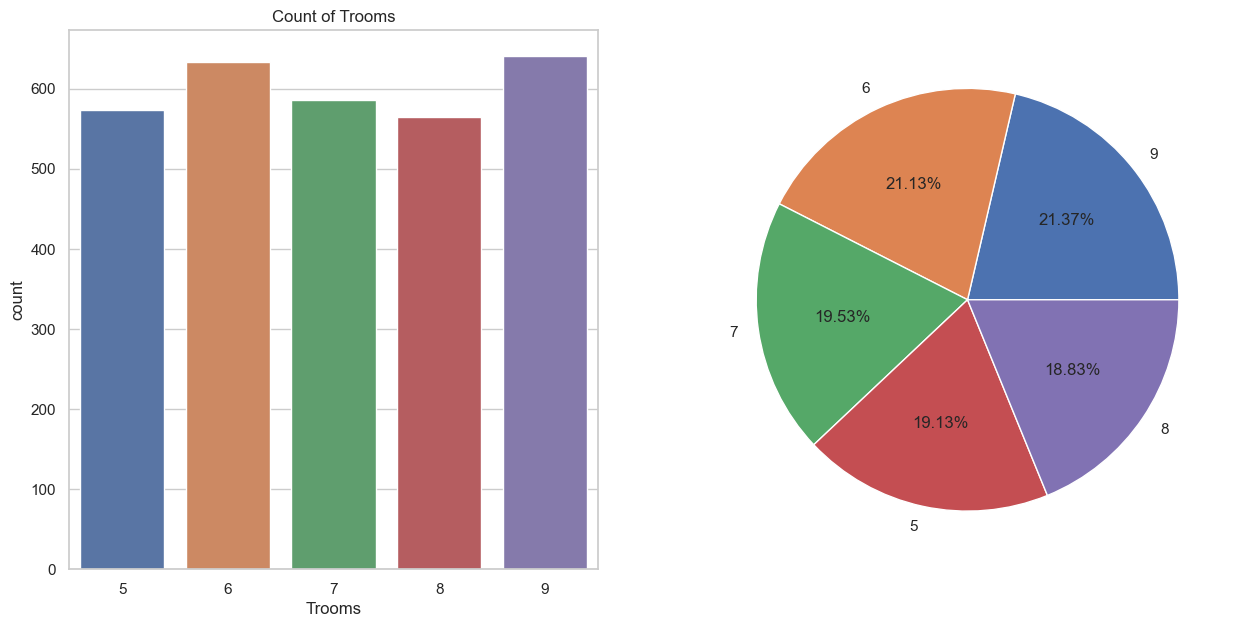

In [16]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Trooms")                  # Set the title of the graph
percentage = df["Trooms"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["Trooms"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = df["Trooms"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

### There are houses with 5,6,7,8 and 9 rooms and the number of houses are approximately uniformly distributed.

## Exploring Feature: Bedrooms:

In [17]:
info_of_cat('Nbedrooms')

Unique values in Nbedrooms are: [5 4 7 8 6 3 2]
Mode of Nbedrooms is 4
Number of missing values in Nbedrooms is 0


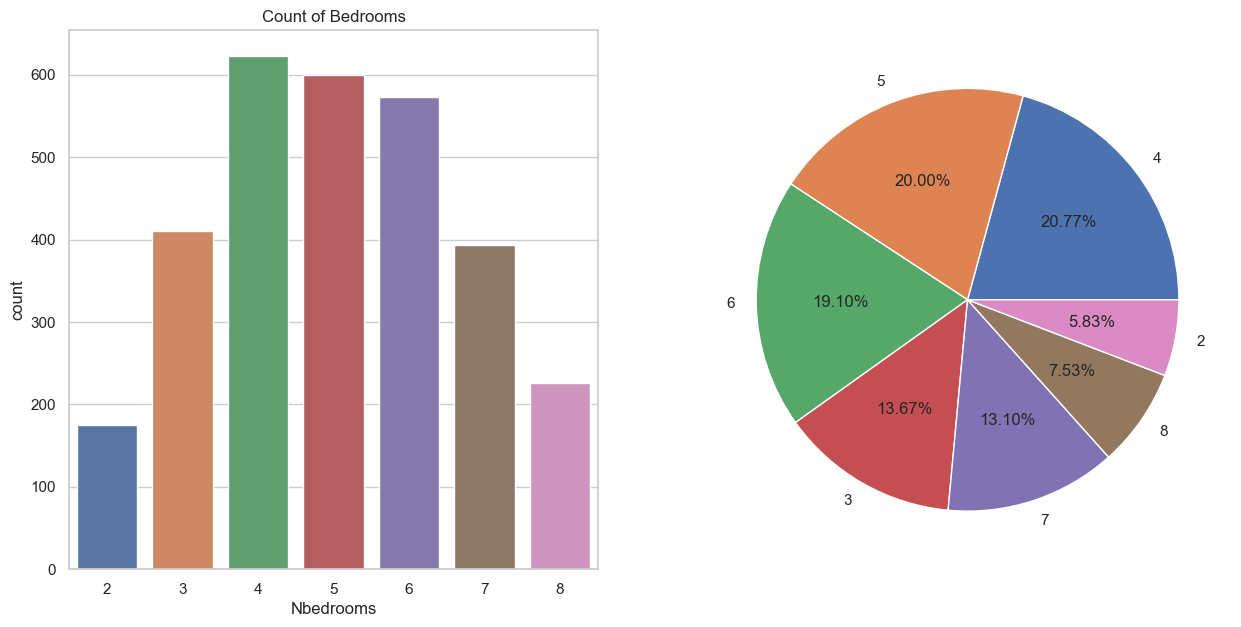

In [19]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Bedrooms")                  # Set the title of the graph
percentage = df["Nbedrooms"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["Nbedrooms"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = df["Nbedrooms"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

### Count of bedrooms vary from 2 to 8 and the number of houses are normally distributed. 4 and 5 are the number of bedrooms in most houses.

## Exploring Feature: Washrooms:

In [20]:
info_of_cat("Nbwashrooms")

Unique values in Nbwashrooms are: [4 3 6 7 5 2 8 1]
Mode of Nbwashrooms is 4
Number of missing values in Nbwashrooms is 0


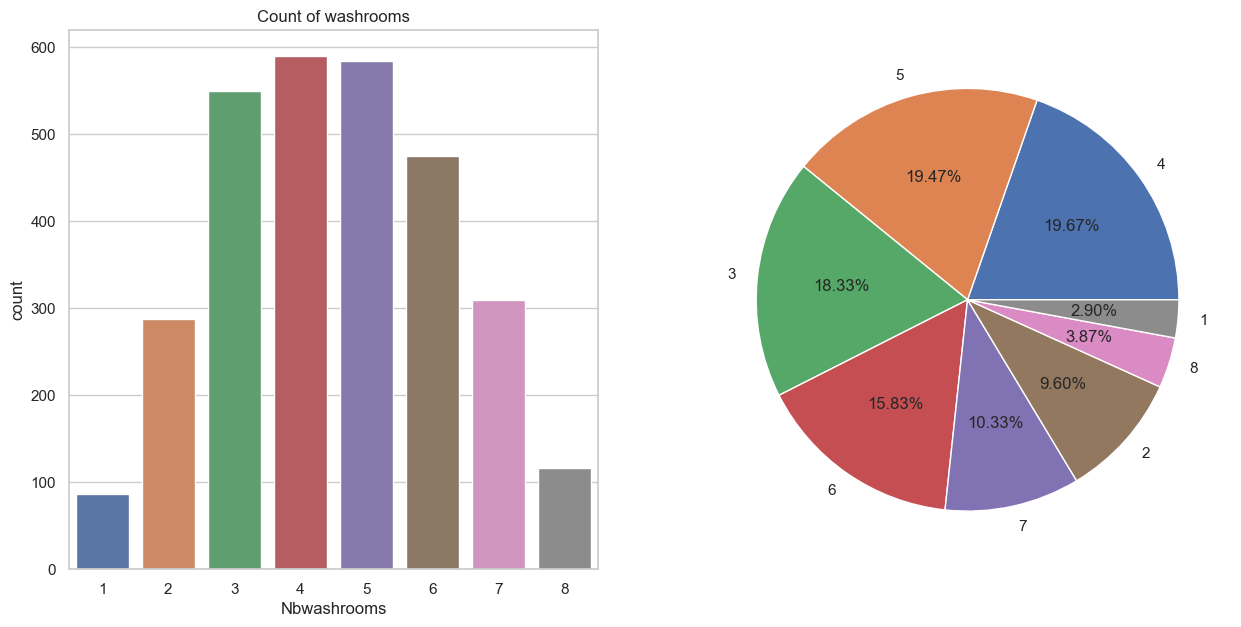

In [22]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of washrooms")                  # Set the title of the graph
percentage = df["Nbwashrooms"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["Nbwashrooms"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = df["Nbwashrooms"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

### Count of Nbwashrooms vary from 1 to 8 and the number of houses with washrooms are normally distributed. 4 and 5 are the highest number of washrooms in most houses.

## Exploring Feature: Twashrooms:

In [23]:
info_of_cat("Twashrooms")

Unique values in Twashrooms are: [ 6  4  5  7  9  8  3  2 10]
Mode of Twashrooms is 5
Number of missing values in Twashrooms is 0


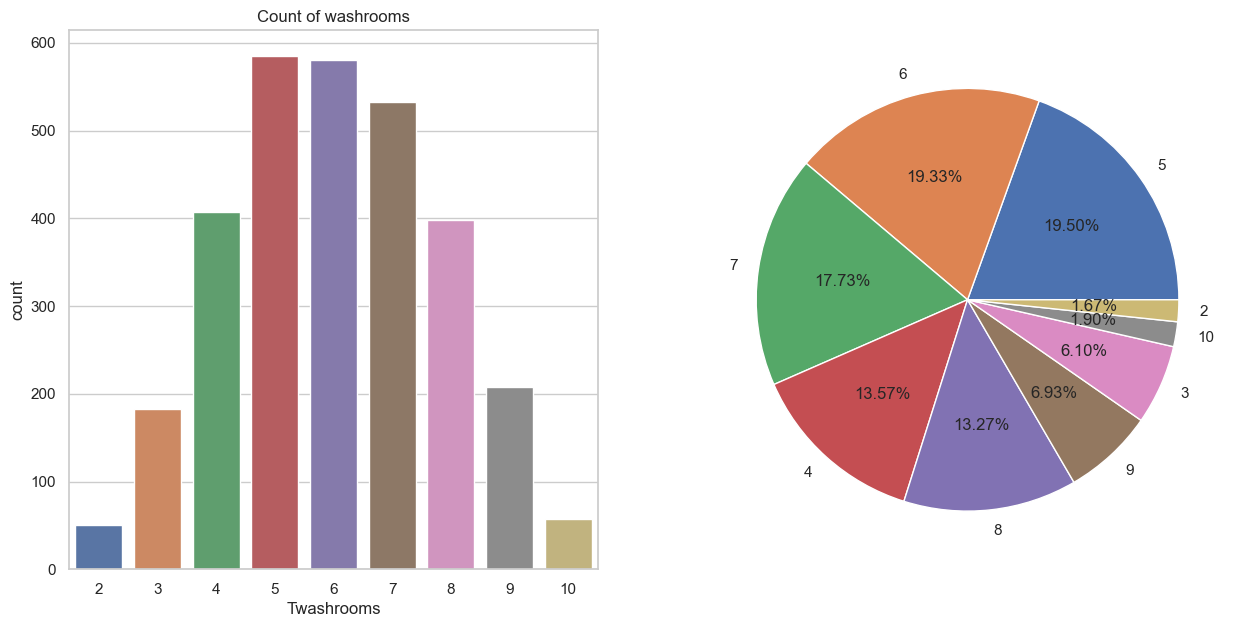

In [24]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of washrooms")                  # Set the title of the graph
percentage = df["Twashrooms"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["Twashrooms"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = df["Twashrooms"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

### Count of Twashrooms vary from 2 to 10 and the number of houses are normally distributed. 5 and 6 are the highest number of washrooms in most houses.

## Exploring Feature: Roof

In [25]:
info_of_cat("roof")

Unique values in roof are: ['NO' 'YES']
Mode of roof is YES
Number of missing values in roof is 0


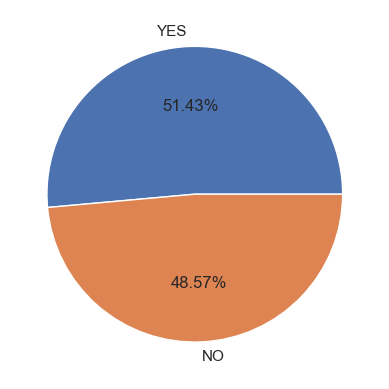

In [27]:
percentage = df["roof"].value_counts()
labels = list(df["roof"].value_counts().index) 
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

### most houses have a roof but 48.5% of the houses does not have a roof.

## Exploring Feature: Floors:

In [28]:
info_of_cat("Nfloors")

Unique values in Nfloors are: [2 3 5 6 1 4 7]
Mode of Nfloors is 3
Number of missing values in Nfloors is 0


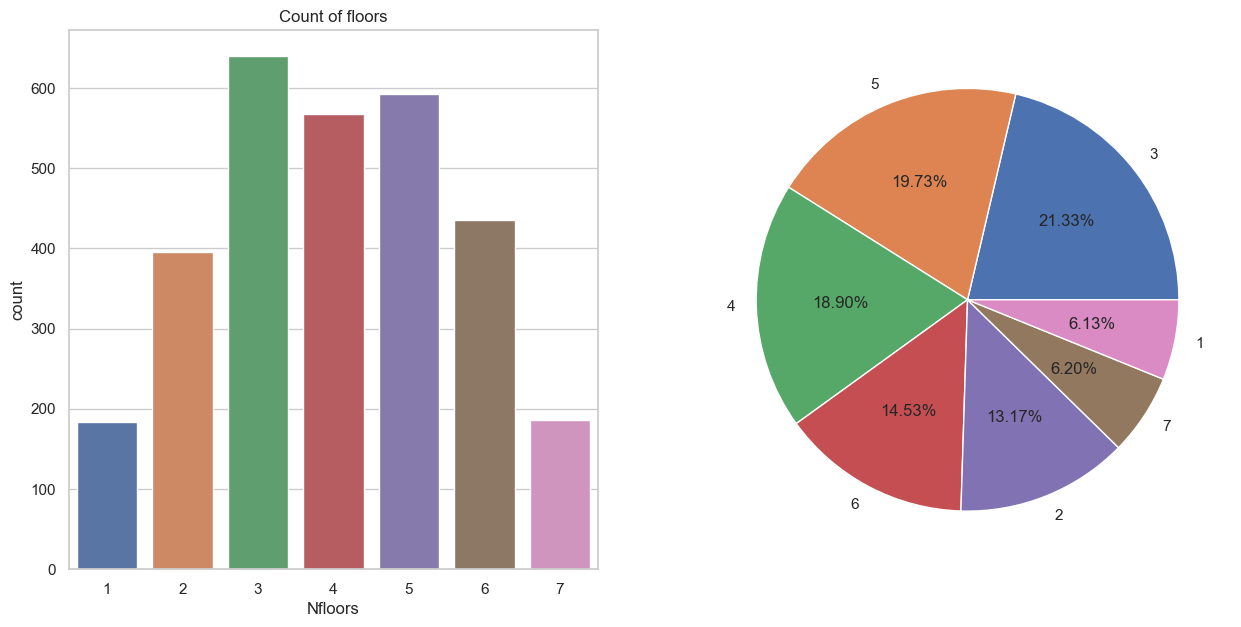

In [29]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of floors")                  # Set the title of the graph
percentage = df["Nfloors"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["Nfloors"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = df["Nfloors"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

### The range of floors are from 1 to 7 and most houses are in floors 3 and 5. 

## Exploring Feature: ANB:

In [30]:
info_of_cat("ANB")

Unique values in ANB are: [6 4 3 2 1 5]
Mode of ANB is 5
Number of missing values in ANB is 0


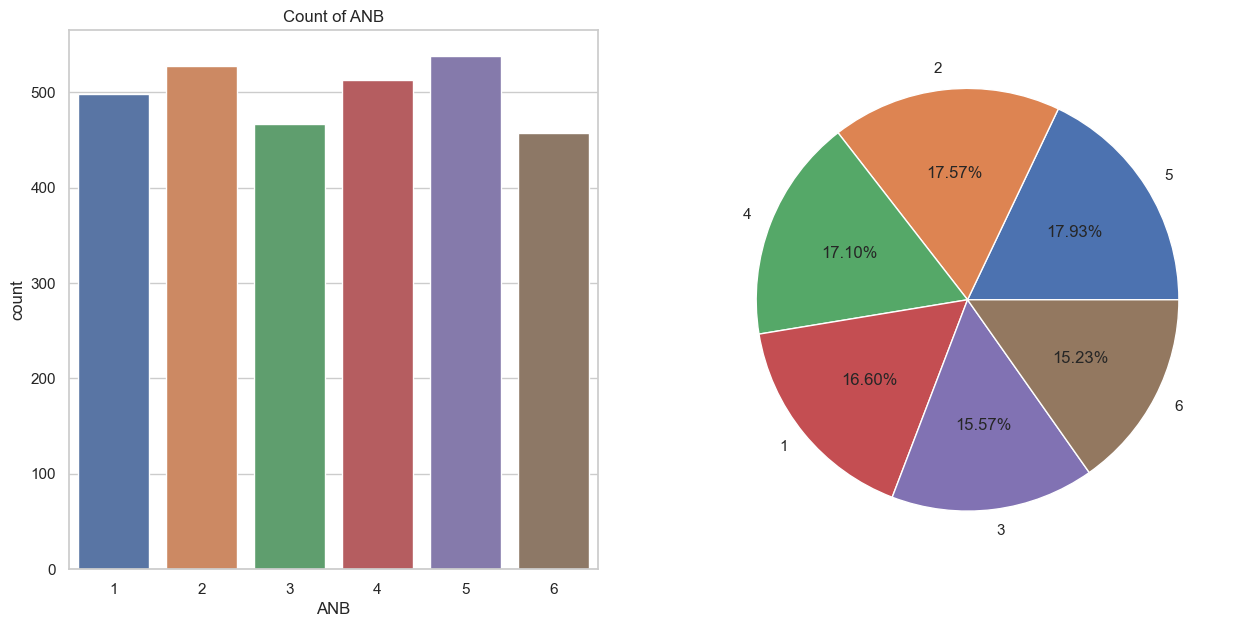

In [31]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of ANB")                  # Set the title of the graph
percentage = df["ANB"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["ANB"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = df["ANB"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

### ANB has a range of 1 to 5 and the population is uniformly distributed.

## Exploring Feature: Roof area:

In [33]:
info_of_cat("Roof(Area)")

Unique values in Roof(Area) are: [  0  71 101  81 103  89  74 116  95  77 118 115  78  87 112  73 111  90
  84 117  93  82 102 113 108 107 110 109 105  96  86  75  98  91 106 100
  97  80  88  85  79  83 104  76 119  72 120 114  94  70  92  99]
Mode of Roof(Area) is 0
Number of missing values in Roof(Area) is 0


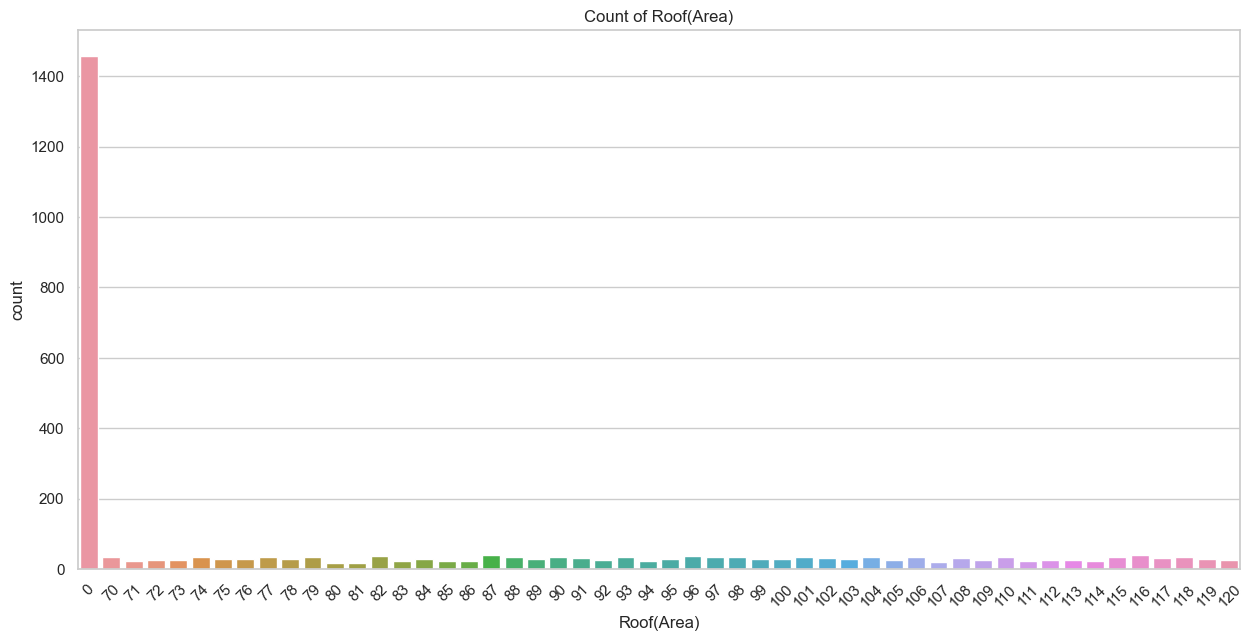

In [41]:
plt.figure(figsize = (15, 7))
plt.title("Count of Roof(Area)")                  # Set the title of the graph
percentage = df["Roof(Area)"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["Roof(Area)"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = df["Roof(Area)"])
plt.xticks(rotation=45)
plt.show()

### Roof area is zero for most of the houses.

## Exploring Feature: Lawn Area:

In [42]:
info_of_cat("Lawn(Area)")

Unique values in Lawn(Area) are: [ 76  96 117  82  75  93 120  95  97 111 105 115 109  84  80  83  81 104
 113 112 116 100 107  94  71  77 114  72 119  86  91  74  85 110  70  88
 106  73 103 108 101  79 102  87  92  99 118  90  98  89  78]
Mode of Lawn(Area) is 101
Number of missing values in Lawn(Area) is 0


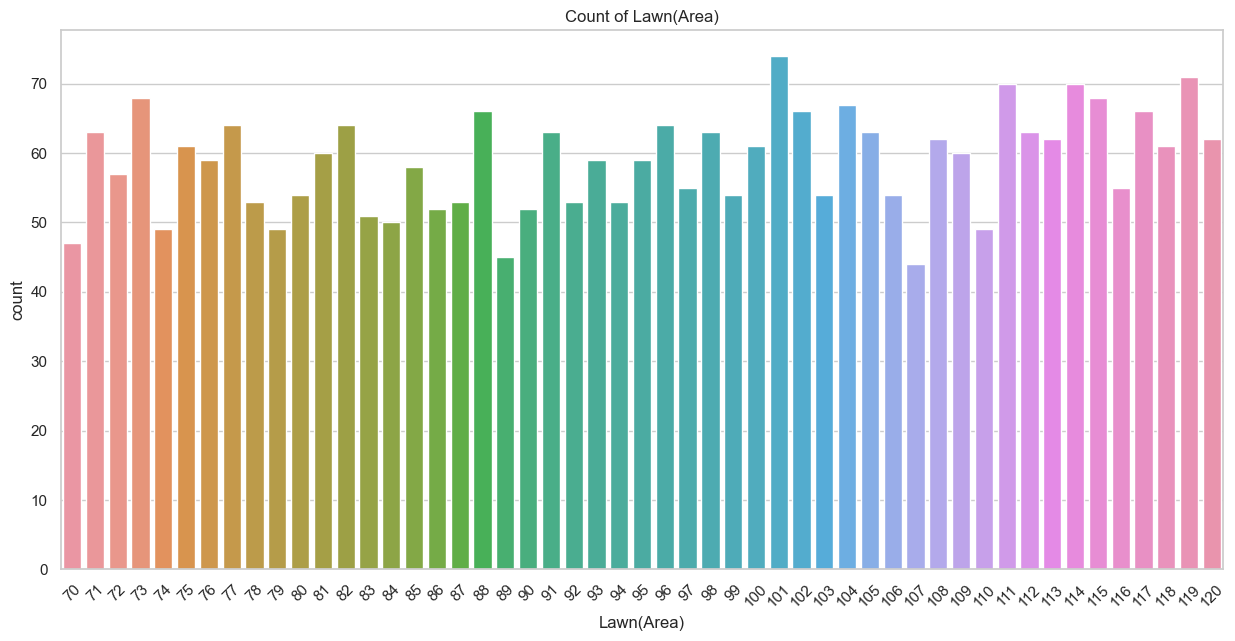

In [43]:
plt.figure(figsize = (15, 7))
plt.title("Count of Lawn(Area)")                  # Set the title of the graph
percentage = df["Lawn(Area)"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["Lawn(Area)"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = df["Lawn(Area)"])
plt.xticks(rotation=45)
plt.show()

### Lawn area if uniformly distributed throughout the dataset.

## Exploring Feature: Air Pollution Index:

In [44]:
info_of_cat("API")

Unique values in API are: [ 79  72  64  59  40  93  87  82  44  89  62  45  73  49  90  46  96  41
  95  78  81  50  42  43  83  84  66  94  70  80  67  69  60  99  97  77
  53  74  54  86  65  52  61  76  91  56  55  58  75  48  57  85  51 100
  63  68  92  88  98  71  47]
Mode of API is 77
Number of missing values in API is 0


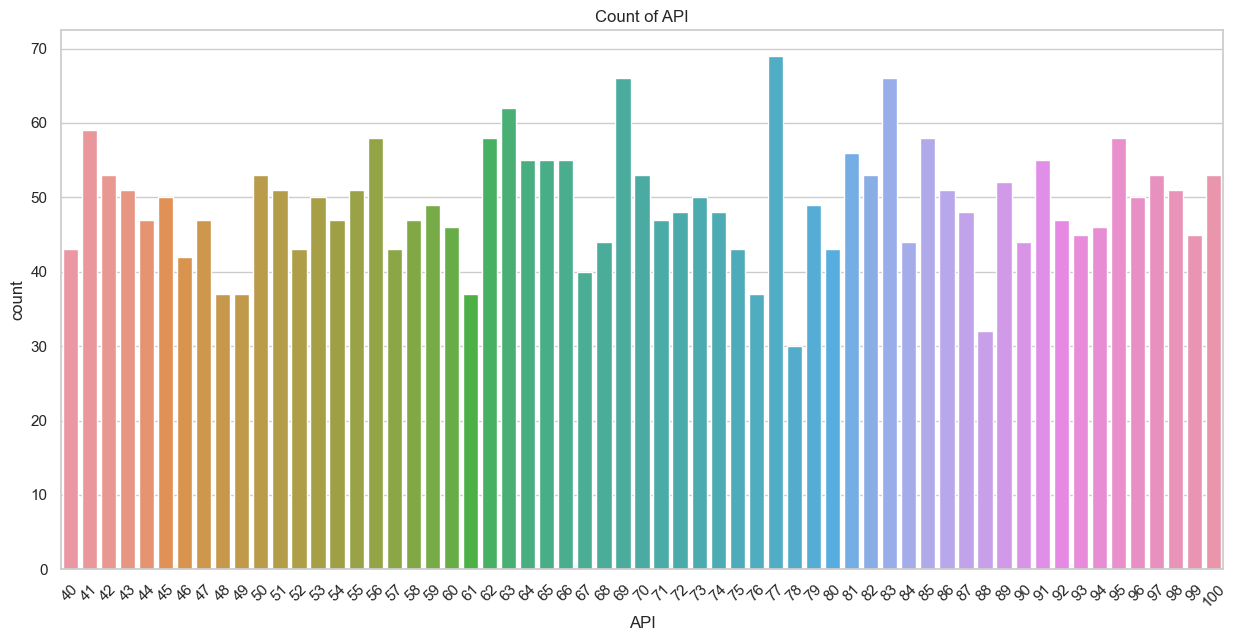

In [45]:
plt.figure(figsize = (15, 7))
plt.title("Count of API")                  # Set the title of the graph
percentage = df["API"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["API"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = df["API"])
plt.xticks(rotation=45)
plt.show()

### Air pollution index scores are equally distributed throughout the dataset.

## Exploring Feature: Grade:

In [46]:
info_of_cat("Grade")

Unique values in Grade are: ['D' 'C' 'B' 'A' 'E']
Mode of Grade is D
Number of missing values in Grade is 0


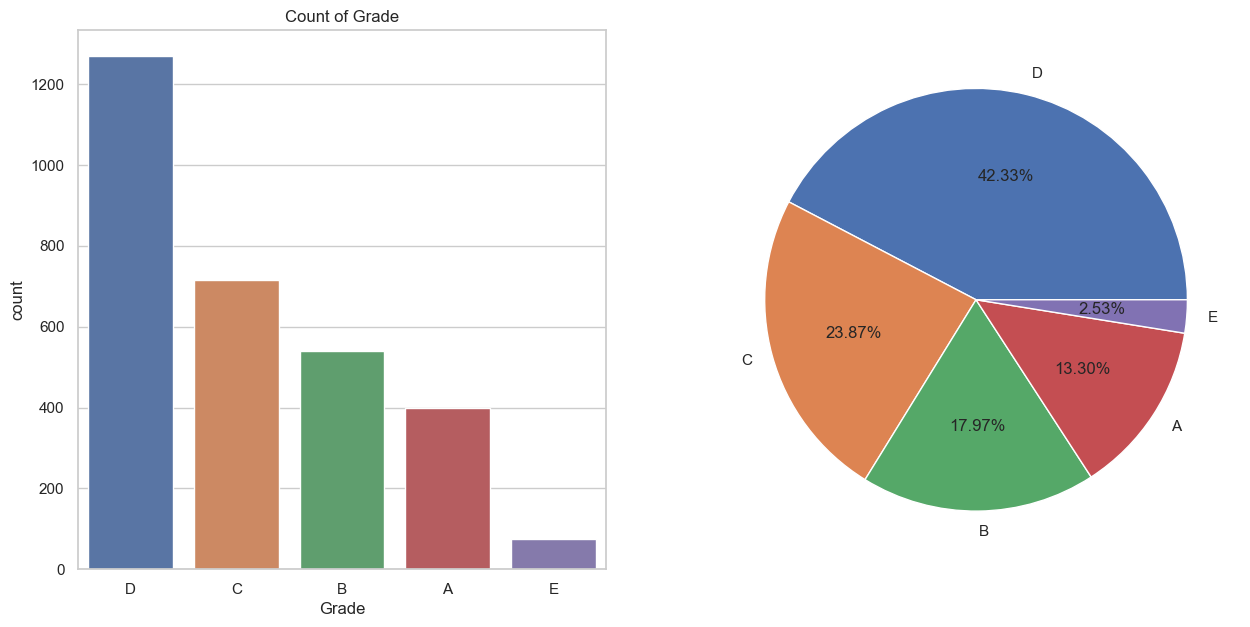

In [47]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Grade")                  # Set the title of the graph
percentage = df["Grade"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["Grade"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = df["Grade"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

### Most houses have grade D and E grade has the least houses.

## Univariate analysis for numerical variables:

In [48]:
def info_of_numerical(col):
    print(f"The mean of the {col} is {df[col].mean()}")
    print(f"The median of the {col} is {df[col].median()}")
    print(f"The mode of the {col} is {df[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {df[col].std()}")
    print(f"Number of missing values in the {col} is {df[col].isnull().sum()}")

## Exploring Feature: Expected price:

In [49]:
info_of_numerical('Expected price')

The mean of the Expected price is 3782.9383333333335
The median of the Expected price is 3771.0
The mode of the Expected price is 3335
The standard deviation of the Expected price is 567.1899952345067
Number of missing values in the Expected price is 0


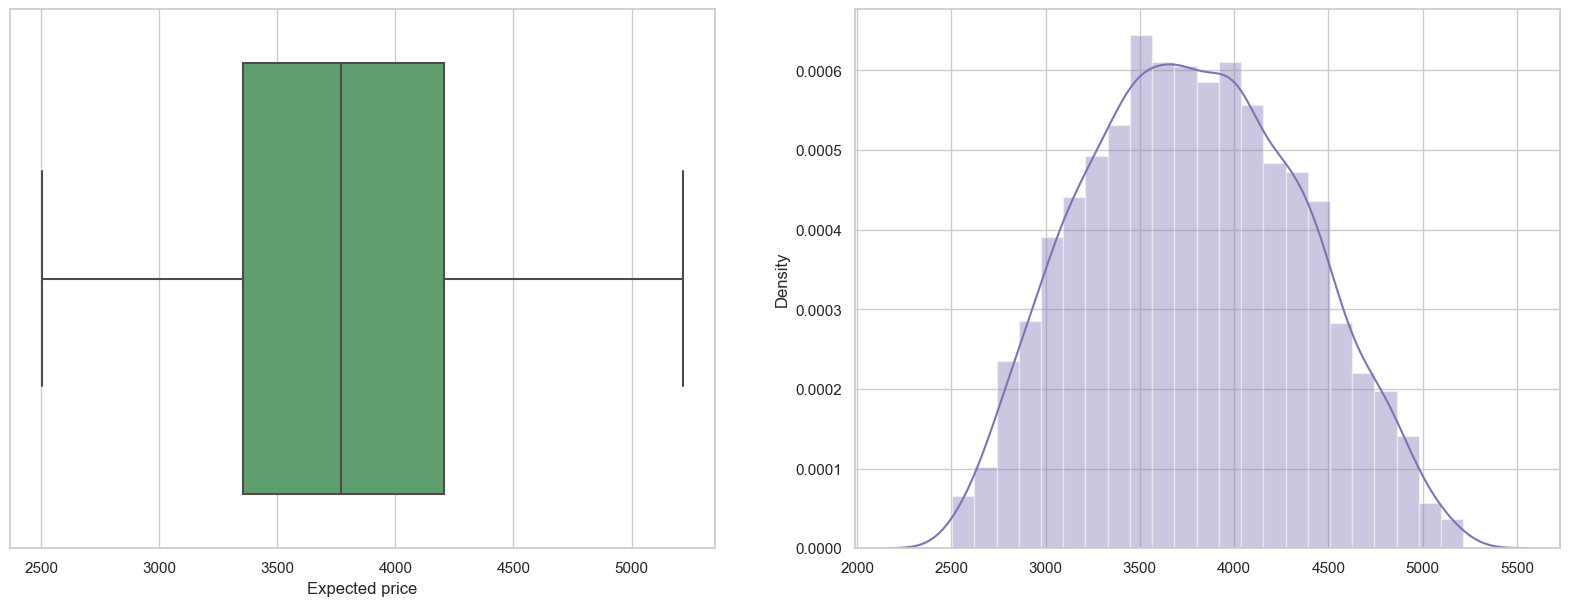

In [50]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.distplot(x = df["Expected price"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = df["Expected price"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

### Expected price is normally distributed and most values lie between 3200 and 4300.

## $$ Bivariate \ Data \ Analysis $$

## Exploring features: Trooms and Grade:

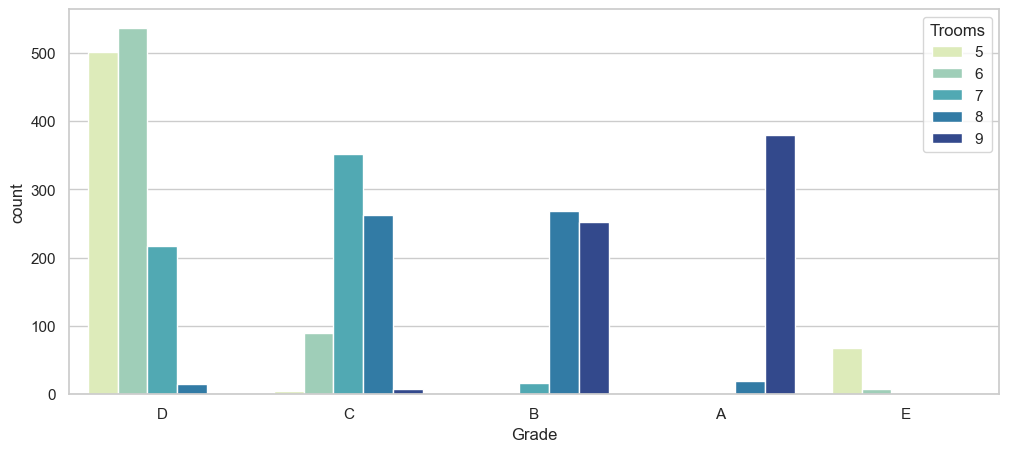

In [115]:
plt.figure(figsize=(12,5))
sns.countplot(x='Grade', data=df, hue='Trooms',  palette='YlGnBu');

### Houses with D grade and having 5 and 6 rooms are the highest in number.

## Exploring Features: Bedrooms and Grade:

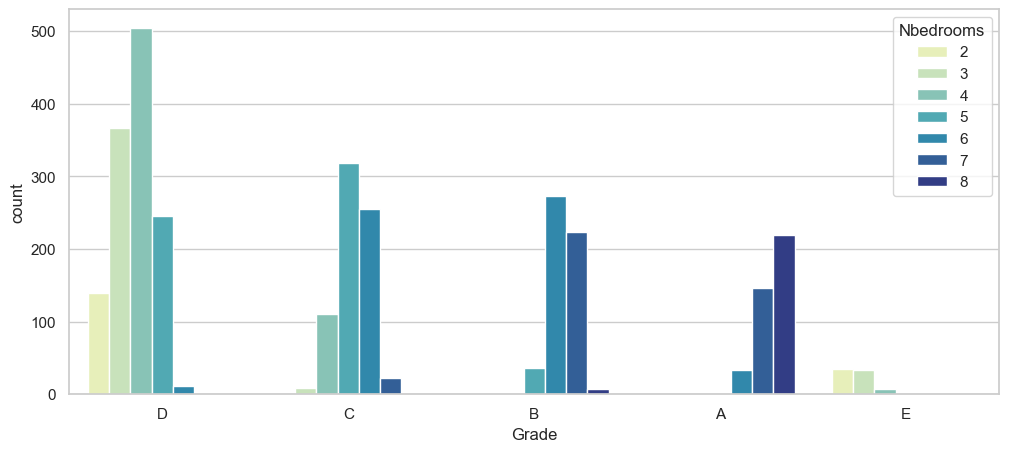

In [118]:
plt.figure(figsize=(12,5))
sns.countplot(x='Grade', data=df, hue='Nbedrooms',  palette='YlGnBu');

### Houses with D grade with 3 and 4 bedrooms are the most in number.

## Exploring features: Roof and Grade:

<AxesSubplot:xlabel='Grade', ylabel='count'>

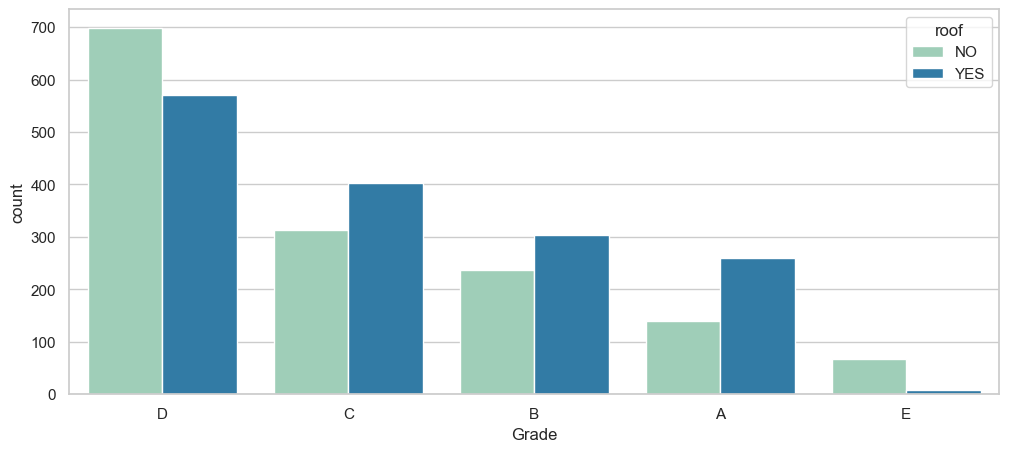

In [120]:
plt.figure(figsize=(12,5))
sns.countplot(x='Grade', data=df, hue='roof',  palette='YlGnBu')

### Both houses with roof and without roof are more in number with D grade.

### Checking for null values:

In [51]:
df.isna().sum()

Id                0
Area(total)       0
Trooms            0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof              0
Roof(Area)        0
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Expected price    0
Grade             0
dtype: int64

### The dataset doesn't have any null values.

In [130]:
df1=df.copy()

## Label Encoding:

In [131]:
df1['roof_encode']=preprocessing.LabelEncoder().fit_transform(df1.roof)
df1['grade_encode']=preprocessing.LabelEncoder().fit_transform(df1.Grade)

In [132]:
df1

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade,roof_encode,grade_encode
0,339,6,5,4,6,NO,0,76,2,79,6,3481,D,0,3
1,358,5,4,3,4,YES,71,96,3,72,4,3510,D,1,3
2,324,7,5,4,5,YES,101,117,5,64,3,3748,C,1,2
3,330,6,4,3,5,YES,101,82,2,59,2,3134,D,1,3
4,320,7,4,4,5,NO,0,75,3,40,1,3843,D,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,341,9,6,5,7,YES,95,115,5,90,2,4246,B,1,1
2996,292,9,8,7,8,YES,116,87,7,97,4,3753,A,1,0
2997,328,7,4,3,5,NO,0,78,5,95,6,3607,D,0,3
2998,293,9,7,7,8,NO,0,78,7,51,3,4198,B,0,1


## Feature Scaling:

In [133]:
def feature_scale(scale):
    new_df=df1.select_dtypes(include='number')
    if scale=="minmax":
        scaler=MinMaxScaler()
    else:
        scale=StandardScaler()
    df_scale=pd.DataFrame(scale.fit_transform(new_df.to_numpy()),columns=new_df.columns)    
    return df_scale

In [134]:
scale ='123'
df_scaled=feature_scale(scale)
df_scaled.head()

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,roof_encode,grade_encode
0,0.677077,-0.718985,-0.014071,-0.299518,-0.005973,-1.004968,-1.321837,-1.241831,0.501655,1.488214,-0.532429,-1.029090,0.874159
1,1.603710,-1.422722,-0.625854,-0.882616,-1.125895,0.451785,0.026334,-0.625028,0.103034,0.307560,-0.481292,0.971733,0.874159
2,-0.054476,-0.015248,-0.014071,-0.299518,-0.565934,1.067315,1.441914,0.608580,-0.352533,-0.282766,-0.061609,0.971733,-0.025490
3,0.238145,-0.718985,-0.625854,-0.882616,-0.565934,1.067315,-0.917385,-1.241831,-0.637262,-0.873093,-1.144319,0.971733,0.874159
4,-0.249557,-0.015248,-0.625854,-0.299518,-0.565934,-1.004968,-1.389245,-0.625028,-1.719234,-1.463420,0.105911,-1.029090,0.874159


## Correlation Heatmap:

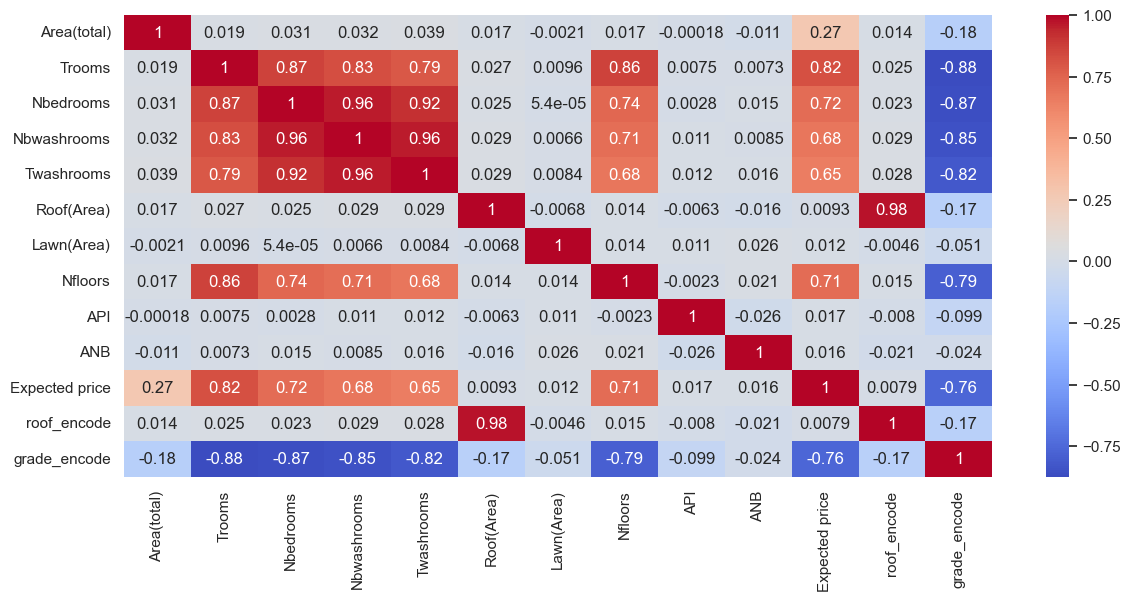

In [135]:
fig=plt.figure(figsize=(14,6))
sns.heatmap(df_scaled.corr(),annot=True,cmap='coolwarm');

In [136]:
df1.drop(columns=['roof','Grade'],inplace=True)

## Train Test splitting:

In [137]:
x=df1.drop(columns='grade_encode',axis=1)
y=df1['grade_encode']

In [138]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

## Model building:

### We have chosen Logistic regression,Decision tree classifier and Adaboosting models to fit the data.

## Logistic Regression:

In [139]:
model=LogisticRegression().fit(x_train,y_train)

In [140]:
model.intercept_

array([-2.23684305e-04, -1.23216421e-04, -7.44574654e-05,  2.88610265e-04,
        1.32747926e-04])

In [141]:
model.coef_

array([[-4.58918881e-02,  1.75157049e-03,  4.04514901e-03,
         4.57867810e-03,  4.30008989e-03,  1.17532258e-02,
        -1.29487452e-02,  2.99992594e-03, -5.72501121e-03,
        -6.63798354e-04,  3.93430088e-03,  1.16942988e-04],
       [-2.30732938e-02,  1.95361052e-03,  1.92351504e-03,
         2.00936799e-03,  2.02618239e-03,  5.07475222e-03,
        -8.80645953e-03,  2.27689857e-03,  8.39224805e-04,
        -7.95437981e-04,  2.20384644e-03,  4.80604497e-05],
       [ 4.48039620e-03, -5.79653789e-05,  3.23893823e-05,
        -1.66088863e-05, -2.93954610e-04,  4.31719135e-03,
         1.80530595e-03,  1.70536371e-04,  2.83314568e-03,
         6.72500427e-04, -2.25683079e-04,  5.73665888e-05],
       [ 3.65283038e-02, -3.23819928e-03, -4.93129710e-03,
        -5.30695819e-03, -4.95610021e-03, -4.53168413e-03,
         1.26031736e-02, -4.71559240e-03,  3.29185112e-03,
         5.26480699e-04, -3.12218561e-03, -6.41274402e-05],
       [ 2.79564819e-02, -4.09016356e-04, -1.0697563

In [142]:
model.score(x_train,y_train)

0.5475

In [143]:
model.score(x_test,y_test)

0.5433333333333333

In [144]:
predict=model.predict(x_test)
predict

array([0, 3, 2, 0, 0, 3, 0, 3, 3, 0, 3, 0, 3, 1, 3, 2, 3, 2, 3, 2, 1, 3,
       3, 2, 1, 3, 2, 3, 3, 3, 3, 1, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 3, 3,
       2, 1, 3, 3, 2, 2, 0, 0, 2, 1, 3, 2, 0, 0, 3, 3, 2, 3, 3, 3, 3, 1,
       3, 3, 1, 0, 3, 3, 0, 1, 3, 2, 3, 1, 3, 1, 1, 3, 0, 0, 3, 1, 2, 2,
       2, 1, 2, 0, 3, 1, 2, 3, 2, 0, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2, 1, 3,
       0, 3, 3, 1, 3, 1, 3, 3, 2, 1, 1, 1, 3, 0, 3, 2, 3, 1, 0, 3, 3, 3,
       2, 3, 1, 3, 1, 2, 3, 1, 3, 3, 2, 3, 3, 2, 2, 3, 2, 1, 0, 3, 3, 3,
       3, 2, 1, 2, 0, 3, 2, 3, 1, 3, 2, 0, 3, 1, 3, 3, 0, 2, 3, 2, 2, 1,
       3, 1, 2, 0, 3, 3, 1, 3, 1, 3, 1, 0, 1, 3, 3, 0, 3, 3, 0, 3, 2, 3,
       3, 3, 1, 3, 1, 1, 0, 1, 1, 3, 2, 3, 2, 2, 3, 3, 1, 1, 1, 2, 2, 1,
       3, 0, 2, 3, 0, 3, 2, 2, 1, 3, 3, 3, 1, 1, 3, 3, 3, 3, 2, 3, 2, 3,
       1, 3, 1, 2, 1, 1, 1, 0, 1, 1, 3, 2, 1, 2, 3, 2, 3, 3, 3, 0, 3, 3,
       3, 2, 3, 3, 3, 0, 3, 1, 3, 3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 2, 2, 3,
       2, 2, 3, 3, 3, 3, 2, 1, 3, 2, 3, 1, 0, 3, 3,

In [145]:
y_test=list(y_test)
predict=list(predict)

In [152]:
dfp=pd.DataFrame({"Actual value":y_test,"Predicted Value":predict})
dfp

,Actual value,Predicted Value
0,2,0
1,3,3
2,1,2
3,0,0
4,0,0
...,...,...
595,3,3
596,2,1
597,3,3
598,3,2


In [148]:
print("Confusion matrix: \n",confusion_matrix(y_test,predict))

#tn, fp, fn, tp = confusion_matrix(y_test,predict).ravel()


Confusion matrix: 
 [[ 29  41  21   0   0]
 [ 23  46  28  11   0]
 [  8  34  46  49   0]
 [  2   8  36 205   0]
 [  0   0   0  13   0]]


<AxesSubplot:>

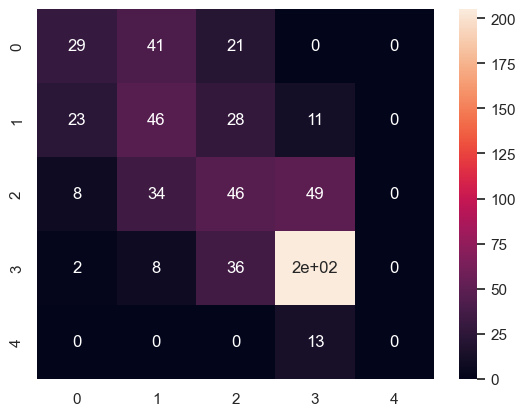

In [149]:
sns.heatmap(confusion_matrix(y_test,predict),annot=True)

In [154]:
print('accuracy:', accuracy_score(y_test, predict))
print('recall:', recall_score(y_test,predict,average='weighted'))
print('f1-score:', f1_score(y_test,predict,average='weighted'))
print('precision:', precision_score(y_test, predict,average='weighted'))

accuracy: 0.5433333333333333
recall: 0.5433333333333333
f1-score: 0.5299791590151742
precision: 0.5237882372042842


In [159]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.47      0.32      0.38        91
           1       0.36      0.43      0.39       108
           2       0.35      0.34      0.34       137
           3       0.74      0.82      0.78       251
           4       0.00      0.00      0.00        13

    accuracy                           0.54       600
   macro avg       0.38      0.38      0.38       600
weighted avg       0.52      0.54      0.53       600



## Decision Tree:

In [157]:
model2=DecisionTreeClassifier()

In [160]:
model2=model2.fit(x_train,y_train)

In [161]:
predict1=model2.predict(x_test)
predict1

array([3, 3, 2, 0, 0, 3, 1, 3, 3, 0, 3, 1, 2, 2, 3, 3, 3, 3, 3, 2, 0, 3,
       3, 2, 2, 2, 0, 2, 2, 3, 3, 1, 3, 0, 1, 2, 0, 3, 2, 2, 0, 4, 3, 3,
       0, 2, 2, 1, 3, 3, 2, 2, 3, 1, 3, 2, 2, 2, 3, 2, 3, 3, 4, 3, 2, 1,
       4, 3, 1, 1, 3, 3, 0, 0, 3, 0, 3, 3, 3, 1, 3, 3, 0, 1, 1, 0, 3, 1,
       2, 2, 1, 0, 3, 2, 3, 3, 1, 1, 3, 4, 3, 3, 1, 0, 3, 2, 0, 2, 2, 2,
       2, 3, 3, 1, 3, 2, 3, 3, 3, 0, 0, 1, 3, 1, 2, 2, 3, 0, 1, 2, 3, 3,
       3, 3, 2, 2, 0, 2, 4, 1, 3, 3, 1, 2, 4, 3, 2, 3, 2, 1, 3, 3, 3, 1,
       3, 3, 0, 3, 1, 4, 2, 3, 0, 2, 3, 1, 3, 2, 3, 1, 0, 3, 3, 3, 2, 2,
       3, 0, 0, 0, 3, 3, 0, 1, 3, 4, 1, 1, 2, 2, 3, 1, 1, 3, 1, 3, 3, 3,
       3, 3, 2, 3, 0, 1, 1, 2, 0, 3, 2, 3, 2, 0, 3, 2, 3, 0, 2, 1, 2, 1,
       3, 2, 2, 3, 2, 3, 2, 2, 1, 3, 3, 3, 2, 0, 3, 4, 3, 4, 3, 3, 2, 3,
       0, 3, 2, 0, 2, 2, 1, 1, 1, 0, 3, 2, 1, 3, 3, 2, 3, 3, 3, 1, 3, 4,
       2, 2, 3, 2, 2, 0, 4, 0, 3, 3, 1, 2, 1, 0, 1, 2, 1, 3, 1, 2, 2, 3,
       2, 3, 3, 3, 1, 3, 2, 1, 3, 0, 3, 0, 1, 3, 3,

In [166]:
predict11=model2.predict(x_train)
predict11

array([3, 3, 3, ..., 2, 3, 2])

In [165]:
print('accuracy of test data set for Decision tree:', accuracy_score(y_test,predict1))

accuracy of test data set for Decision tree: 0.8366666666666667


In [167]:
print('accuracy of train data set for Decision tree:', accuracy_score(y_train,predict11))

accuracy of train data set for Decision tree: 1.0


In [168]:
print('accuracy:', accuracy_score(y_test,predict1))
print('recall:', recall_score(y_test,predict1,average='weighted'))
print('f1-score:', f1_score(y_test,predict1,average='weighted'))
print('precision:', precision_score(y_test,predict1,average='weighted'))

accuracy: 0.8366666666666667
recall: 0.8366666666666667
f1-score: 0.8382319273622386
precision: 0.8414686109354627


In [169]:
print(classification_report(y_test,predict1))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        91
           1       0.76      0.72      0.74       108
           2       0.74      0.78      0.76       137
           3       0.92      0.90      0.91       251
           4       0.53      0.77      0.62        13

    accuracy                           0.84       600
   macro avg       0.77      0.81      0.79       600
weighted avg       0.84      0.84      0.84       600



In [170]:
confusion_matrix(y_test,predict1)

array([[ 80,  11,   0,   0,   0],
       [  7,  78,  23,   0,   0],
       [  0,  13, 107,  17,   0],
       [  0,   0,  15, 227,   9],
       [  0,   0,   0,   3,  10]], dtype=int64)

In [183]:
dfp2=pd.DataFrame({"Actual value":y_test,"Predicted Value":predict1})
dfp2

,Actual value,Predicted Value
0,2,3
1,3,3
2,1,2
3,0,0
4,0,0
...,...,...
595,3,3
596,2,2
597,3,3
598,3,3


## AdaBoosting:

In [171]:
from sklearn.ensemble import AdaBoostClassifier

In [172]:
model3=AdaBoostClassifier()

In [173]:
model3=model3.fit(x_train,y_train)

In [175]:
predict2=model3.predict(x_test)
predict2

array([2, 4, 1, 1, 1, 3, 1, 4, 3, 1, 3, 1, 2, 2, 4, 3, 4, 3, 3, 2, 1, 3,
       3, 3, 1, 2, 1, 3, 3, 4, 3, 1, 4, 1, 2, 3, 1, 3, 2, 2, 1, 4, 3, 4,
       1, 1, 1, 2, 3, 3, 1, 2, 3, 1, 4, 3, 2, 2, 4, 2, 3, 3, 4, 4, 3, 1,
       4, 3, 1, 1, 3, 4, 1, 1, 3, 1, 4, 3, 4, 1, 3, 3, 1, 1, 1, 1, 3, 1,
       1, 2, 1, 1, 4, 1, 3, 3, 2, 1, 4, 4, 4, 3, 2, 1, 4, 2, 1, 2, 1, 3,
       1, 3, 3, 2, 4, 1, 3, 3, 3, 1, 1, 1, 3, 1, 3, 3, 4, 1, 1, 3, 3, 4,
       3, 4, 2, 3, 1, 2, 4, 1, 3, 3, 1, 2, 4, 3, 2, 4, 1, 1, 2, 4, 3, 2,
       4, 3, 1, 3, 1, 4, 1, 4, 1, 3, 3, 1, 3, 1, 3, 1, 1, 3, 4, 3, 1, 3,
       3, 1, 1, 1, 4, 4, 1, 2, 3, 3, 1, 1, 2, 1, 3, 1, 1, 3, 1, 4, 4, 3,
       3, 3, 1, 3, 1, 2, 1, 1, 1, 3, 1, 3, 1, 1, 4, 3, 3, 1, 1, 1, 1, 1,
       4, 1, 3, 3, 2, 3, 2, 2, 1, 4, 3, 3, 2, 1, 3, 4, 4, 4, 4, 3, 3, 3,
       1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 3, 2, 1, 3, 3, 3, 4, 3, 4, 1, 3, 4,
       3, 1, 3, 1, 4, 1, 4, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 2, 4,
       3, 3, 3, 4, 1, 4, 2, 1, 3, 1, 4, 1, 1, 3, 3,

In [179]:
predict22=model.predict(x_train)
predict22

array([3, 3, 3, ..., 2, 3, 2])

In [176]:
model3.score(x_train,y_train)

0.6004166666666667

In [177]:
model3.score(x_test,y_test)

0.5383333333333333

In [180]:
print('accuracy:', accuracy_score(y_test,predict2))
print('recall:', recall_score(y_test,predict2,average='weighted'))
print('f1-score:', f1_score(y_test,predict2,average='weighted'))
print('precision:', precision_score(y_test,predict2,average='weighted'))

accuracy: 0.5383333333333333
recall: 0.5383333333333333
f1-score: 0.5192705827425728
precision: 0.5728099359711678


In [181]:
print(classification_report(y_test,predict2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        91
           1       0.42      0.87      0.57       108
           2       0.75      0.37      0.50       137
           3       0.77      0.67      0.72       251
           4       0.12      0.85      0.21        13

    accuracy                           0.54       600
   macro avg       0.41      0.55      0.40       600
weighted avg       0.57      0.54      0.52       600



In [182]:
confusion_matrix(y_test,predict2)

array([[  0,  91,   0,   0,   0],
       [  0,  94,  14,   0,   0],
       [  0,  39,  51,  47,   0],
       [  0,   0,   3, 167,  81],
       [  0,   0,   0,   2,  11]], dtype=int64)

In [184]:
dfp3=pd.DataFrame({"Actual value":y_test,"Predicted Value":predict2})
dfp3

,Actual value,Predicted Value
0,2,2
1,3,4
2,1,1
3,0,1
4,0,1
...,...,...
595,3,3
596,2,1
597,3,3
598,3,3


## Comparison:

### Logistic Regression:

In [191]:
print('accuracy:', accuracy_score(y_test, predict))
print('recall:', recall_score(y_test,predict,average='weighted'))
print('f1-score:', f1_score(y_test,predict,average='weighted'))
print('precision:', precision_score(y_test, predict,average='weighted'))

accuracy: 0.5433333333333333
recall: 0.5433333333333333
f1-score: 0.5299791590151742
precision: 0.5237882372042842


### Decision tree classifier:

In [192]:
print('accuracy:', accuracy_score(y_test,predict1))
print('recall:', recall_score(y_test,predict1,average='weighted'))
print('f1-score:', f1_score(y_test,predict1,average='weighted'))
print('precision:', precision_score(y_test,predict1,average='weighted'))

accuracy: 0.8366666666666667
recall: 0.8366666666666667
f1-score: 0.8382319273622386
precision: 0.8414686109354627


### AdaBoostClassifier:

In [193]:
print('accuracy:', accuracy_score(y_test,predict2))
print('recall:', recall_score(y_test,predict2,average='weighted'))
print('f1-score:', f1_score(y_test,predict2,average='weighted'))
print('precision:', precision_score(y_test,predict2,average='weighted'))

accuracy: 0.5383333333333333
recall: 0.5383333333333333
f1-score: 0.5192705827425728
precision: 0.5728099359711678


### After comparing the evaluation metrics of 3 different models, we can choose Decision Tree Classifier since it has the highest score of all 3 models and can be used for deployment.